# MPC Formulation

The optimization problem is given by:


\begin{equation*}
\begin{aligned}
\min_{\mathbf{x}, \mathbf{u}} \quad J =  \| \mathbf{x} - \mathbf{x}_r \| + \gamma \| \mathbf{\hat{u}_k} \|
\end{aligned}
\end{equation*}

where:

- $\mathbf{x} = [p, \dot{p}]^T$ in $ \mathbb{R}^{Nn_x \times 1} $: State vector defined as position $ p = [X, Y, Z] $ in $ \mathbb{R}^{\frac{n}{2} \times 1} $ and velocity $ \dot{p} = [\dot{X}, \dot{Y}, \dot{Z}] $ in $ \mathbb{R}^{\frac{n}{2} \times 1} $, where $ n $ is the workspace dimension (here, $ n = 6 $).

- $\mathbf{x}_r = [p_r \quad \dot{p}_r]^T$: Reference position and velocity.

- $ \hat{u}_k \in \mathbb{R}^{Nn_u \times 1} $: Control state input of the system and also the acceleration.

- $ \gamma$: Scalar representing the weight of the control input on the system.


In [1]:
# Cell 1: Import necessary libraries and define functions
import sys
from Classes.MPC_1Dd import MPCSimulator,GenerateStep
import time
import matplotlib.pyplot as plt
import numpy as np
import itertools


# Cell 2: Explanation of Parameters

In this cell, we define the parameters used in the Model Predictive Control (MPC) simulation and provide an example usage.

## Parameters:
- `dTm`: Time step for the simulation.
- `TimeMPC`: time step of the MPC time horizon.
- `qx`: Weighting factor for position in the cost function.
- `qdx`: Weighting factor for velocity in the cost function.
- `gamma`: Weighting factor for the control input in the cost function.
- `Xcons`: Constraints on the state [xmin, xmax, dxmin, dxmax].
- `Ucons`: Constraints on the control input [umin, umax].
- `QTermCost`: Weighting matrix for terminal cost in the position and velocity.
- `RTermCost`: Weighting matrix for terminal control input in the cost function.


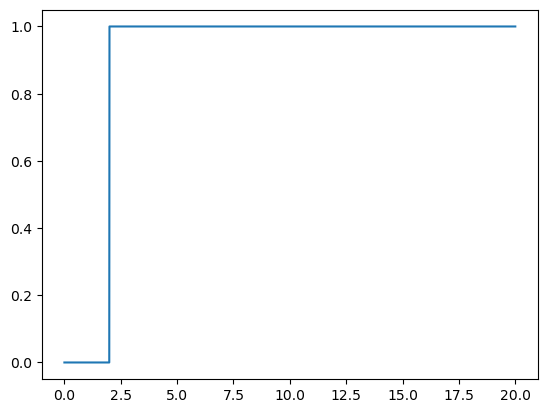

In [2]:
# Define the parameters and the step function generator

dTm = 0.01 
TimeMPC = 0.3
qx = 1.0
qdx = 0.1
gamma = 1e-5
Xcons = [-0.0, 1.1, -0.8, 0.8]
Ucons = [-20, 20]
QTermCost = [1.0, 0.1]
RTermCost = [1e-5]
# Example usage
threshold_time = 2.0
total_time = 20.0
delta_time = 0.01
start_time = 0.0
step_value = 1.0

# We want to test our MPC on a step function with a threshold time of 2 seconds and a total time of 10 seconds with a step value of 0.5:
t, x,dx= GenerateStep(threshold_time, total_time, delta_time, start_time,step_value)
mpc_simulator = MPCSimulator()
plt.plot(t,x)




In [3]:

results_dict = mpc_simulator.run_MPC_simulation(TimeMPC, dTm, qx, qdx, gamma, x, dx, total_time, delta_time, Xcons, Ucons, QTermCost, RTermCost)

        # return {
        #         'xn': xn,  # List of all the first ith calculated MPC state positions used in the next time step
        #         'dxn': dxn,  # List of first ith velocities used in the MPC
        #         'ddxn': ddxn,  # List of the first control inputs for the horizon across simulation timesteps
        #         'time_vector': time_vector,  # List of time values corresponding to each simulation timestep
        #         'elapsed_time': elapsed_time,  # Time taken to complete the MPC simulation loop
        #         'rise_time': rise_time,  # Time taken for the system state to rise from 10% to 90% of the final value
        #         'Final_Error': FinalError,  # Absolute difference between the final desired position and the last calculated position
        #         'OvershootingRatio': ROverShooting,  # Percentage of overshooting relative to the final desired position
        #         'Maxmpctime': Maxelapsed_time  # Maximum time taken by the Quadratic Programming solver for a single problem set
        #     }

# Cell 4: Create plots 



/home/elio/.local/lib/python3.8/site-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted G to scipy.sparse.csc.csc_matrix
For best performance, build G as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


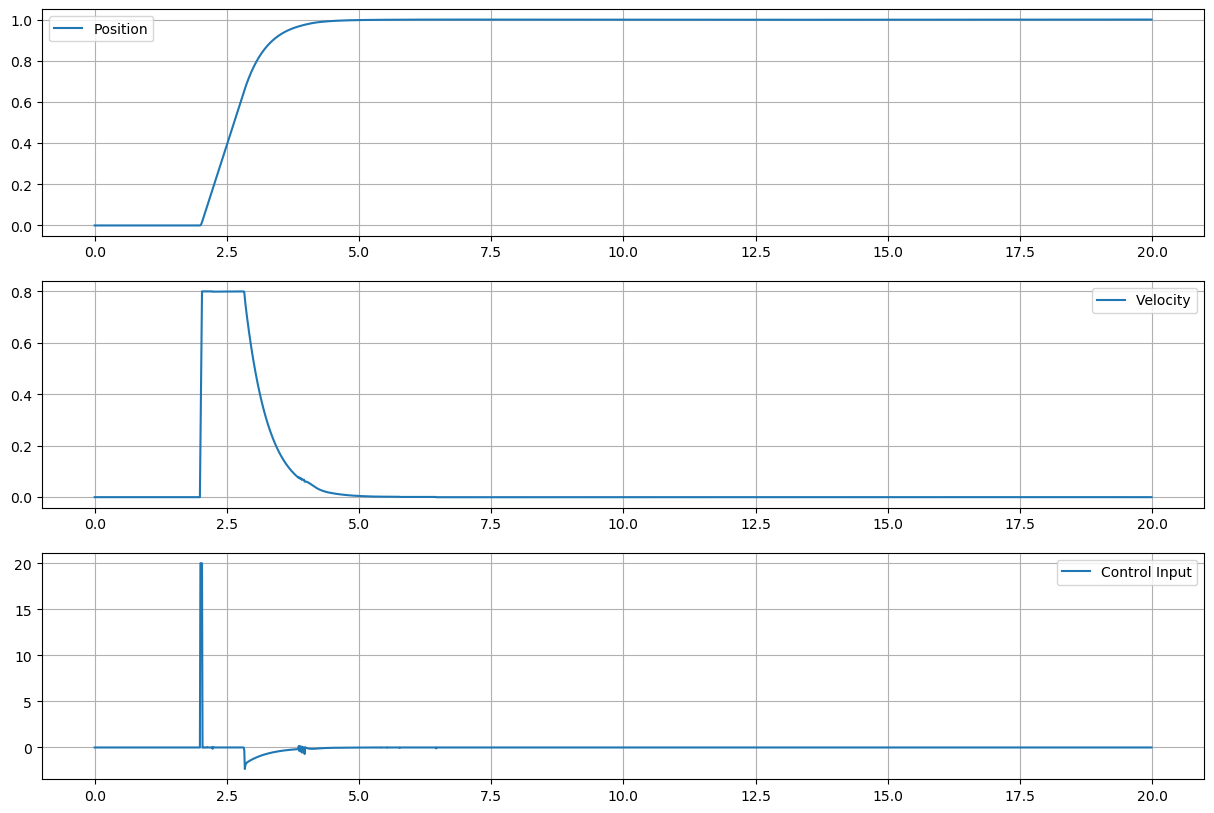

Elapsed Time: 0.0005166530609130859
Rise Time: 1.2399999999999736
Final Error: 0.0004005568060665432
Overshooting Ratio: 0.041556979118473336
Max MPC Time: 0.0015032291412353516


In [4]:
# Access the results from the results_dict
xn = results_dict['xn']
dxn = results_dict['dxn']
ddxn = results_dict['ddxn']
time_vector = results_dict['time_vector']
elapsed_time = results_dict['elapsed_time']
rise_time = results_dict['rise_time']
Final_Error = results_dict['Final_Error']
ROverShooting = results_dict['OvershootingRatio']
Maxmpctime = results_dict['Maxmpctime']

# Plot the position, velocity and control input across the simulation time
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.plot(results_dict['time_vector'], results_dict['xn'], label='Position')

plt.legend()
plt.grid()
plt.subplot(3, 1, 2)
plt.plot(results_dict['time_vector'], results_dict['dxn'], label='Velocity')
plt.legend()
plt.grid()
plt.subplot(3, 1, 3)
plt.plot(results_dict['time_vector'], results_dict['ddxn'], label='Control Input')
plt.legend()
plt.grid()
plt.show()

# You can also print out analysis metrics
print('Elapsed Time:', elapsed_time)
print('Rise Time:', rise_time)
print('Final Error:', Final_Error)
print('Overshooting Ratio:', ROverShooting)
print('Max MPC Time:', Maxmpctime)



## Congratulation on running your first MPC trajectory! 

By defining the parameters and the desired step response, you were able to simulate the system using Model Predictive Control (MPC). 
You might notice that the response of your MPC trajectory is not that nice (unless you hit the jackpot and you managed to choose parameters that give you the fastest,damped and error-free response) which is normal given that there was 7 parameters to consider for this 1-D system where each parameter is responsible of changing the results of your controller. 

Next: Run the following cells to the difference between the results of different MPC parameters and its impact on the the results



[(0.04, 1.0, 0.1), (0.04, 1.0, 0.001), (0.04, 1.0, 1e-05), (0.04, 0.5, 0.1), (0.04, 0.5, 0.001), (0.04, 0.5, 1e-05), (0.04, 0.1, 0.1), (0.04, 0.1, 0.001), (0.04, 0.1, 1e-05), (0.08, 1.0, 0.1), (0.08, 1.0, 0.001), (0.08, 1.0, 1e-05), (0.08, 0.5, 0.1), (0.08, 0.5, 0.001), (0.08, 0.5, 1e-05), (0.08, 0.1, 0.1), (0.08, 0.1, 0.001), (0.08, 0.1, 1e-05), (0.3, 1.0, 0.1), (0.3, 1.0, 0.001), (0.3, 1.0, 1e-05), (0.3, 0.5, 0.1), (0.3, 0.5, 0.001), (0.3, 0.5, 1e-05), (0.3, 0.1, 0.1), (0.3, 0.1, 0.001), (0.3, 0.1, 1e-05)]


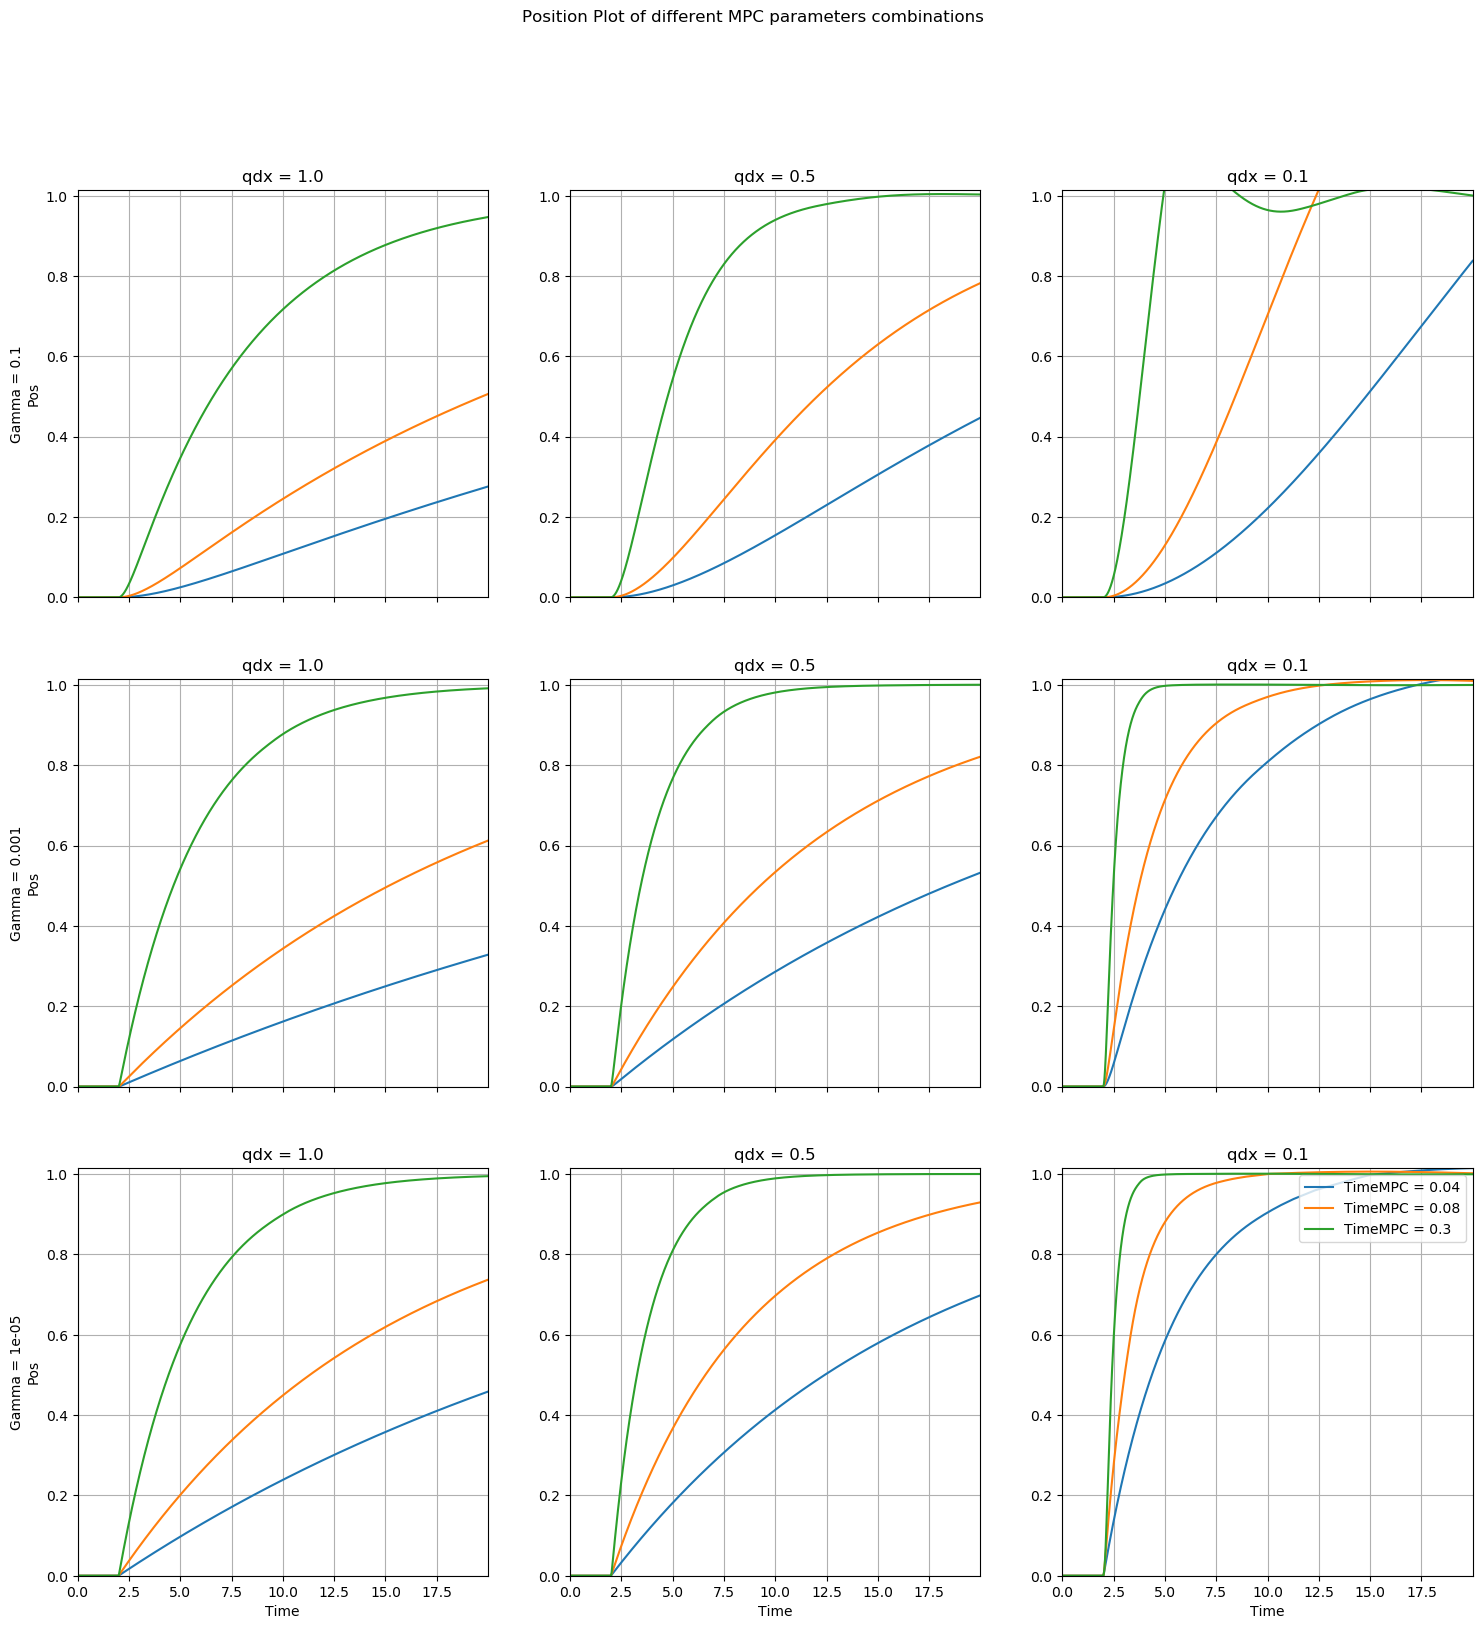

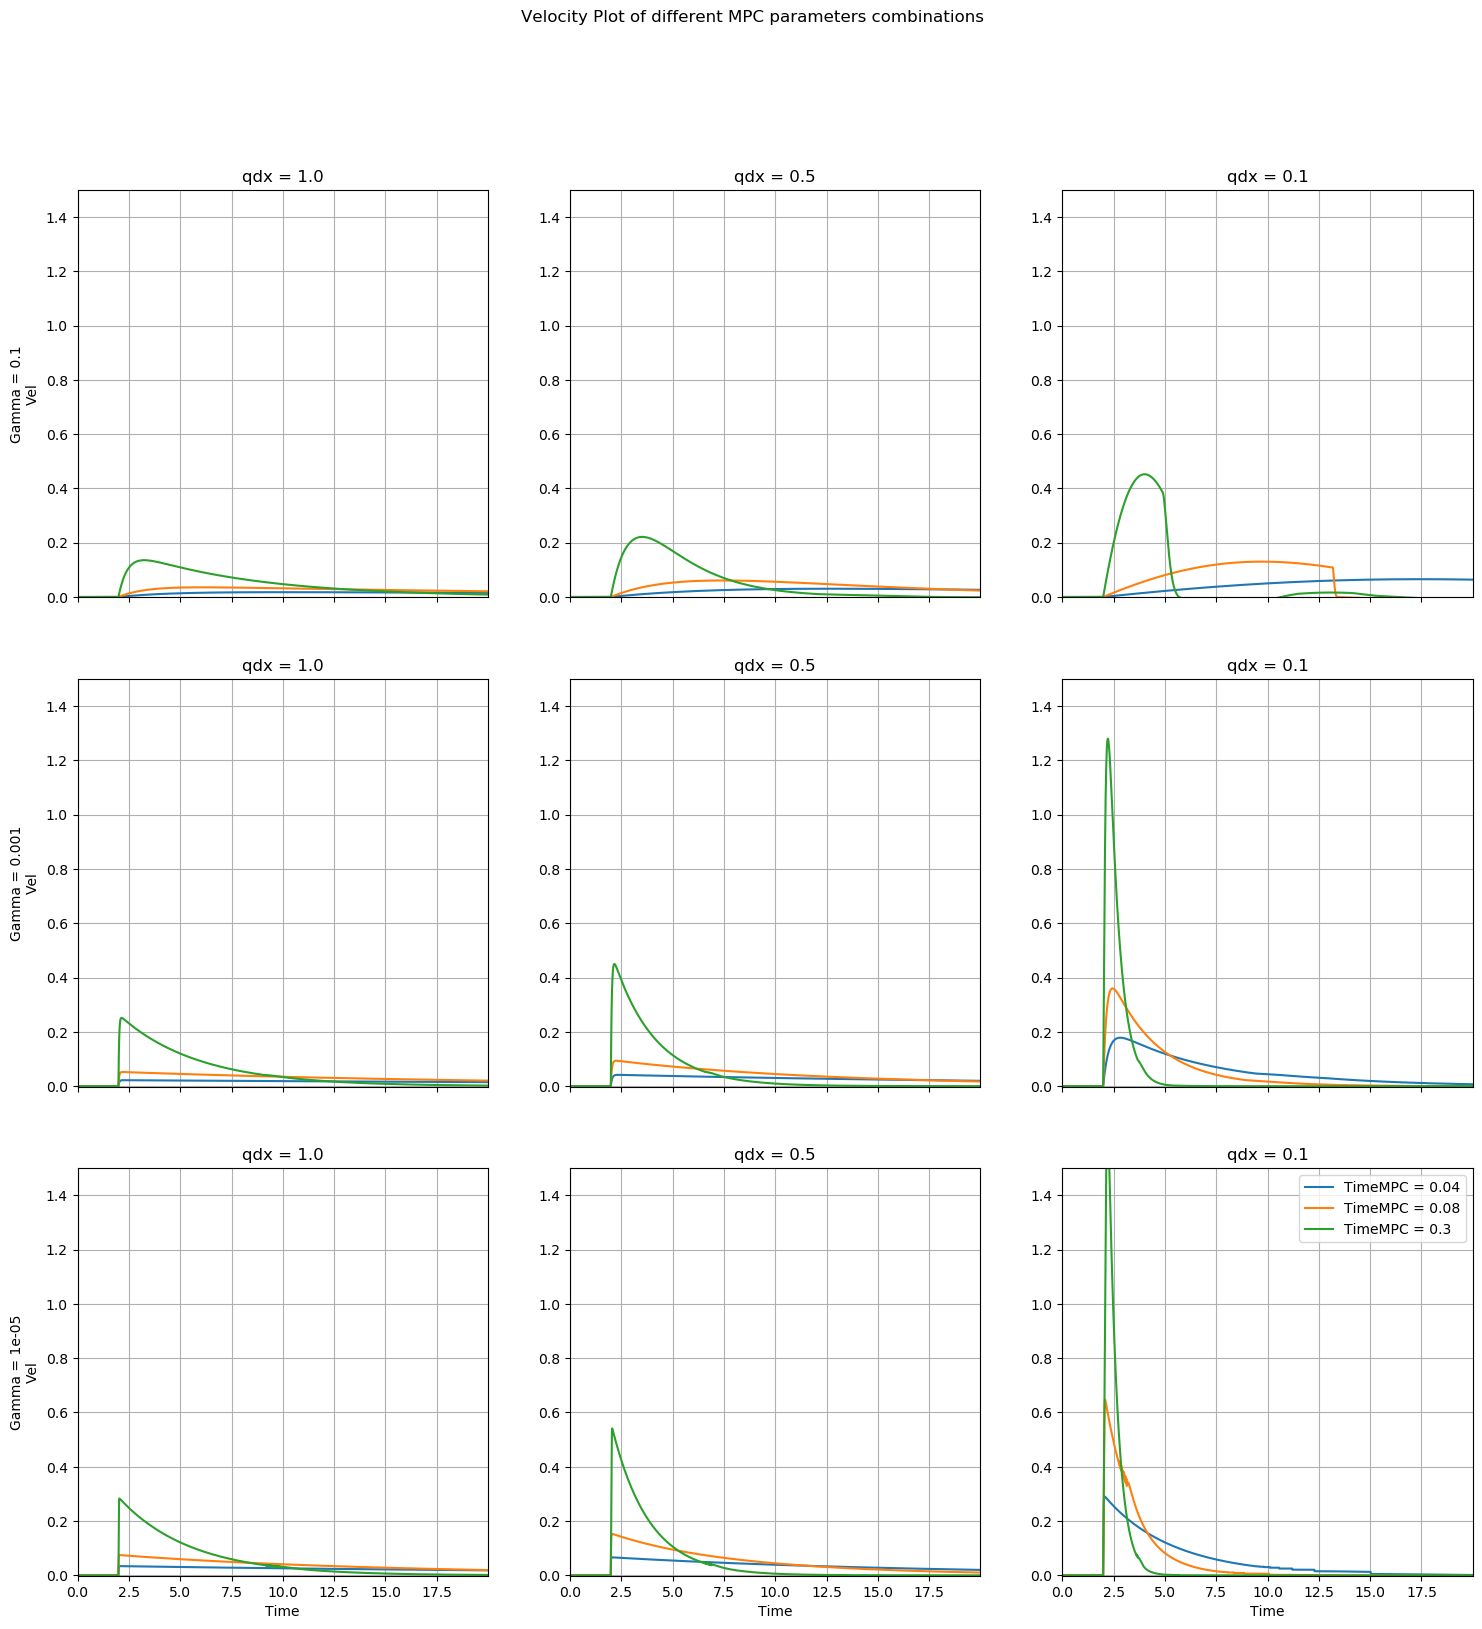

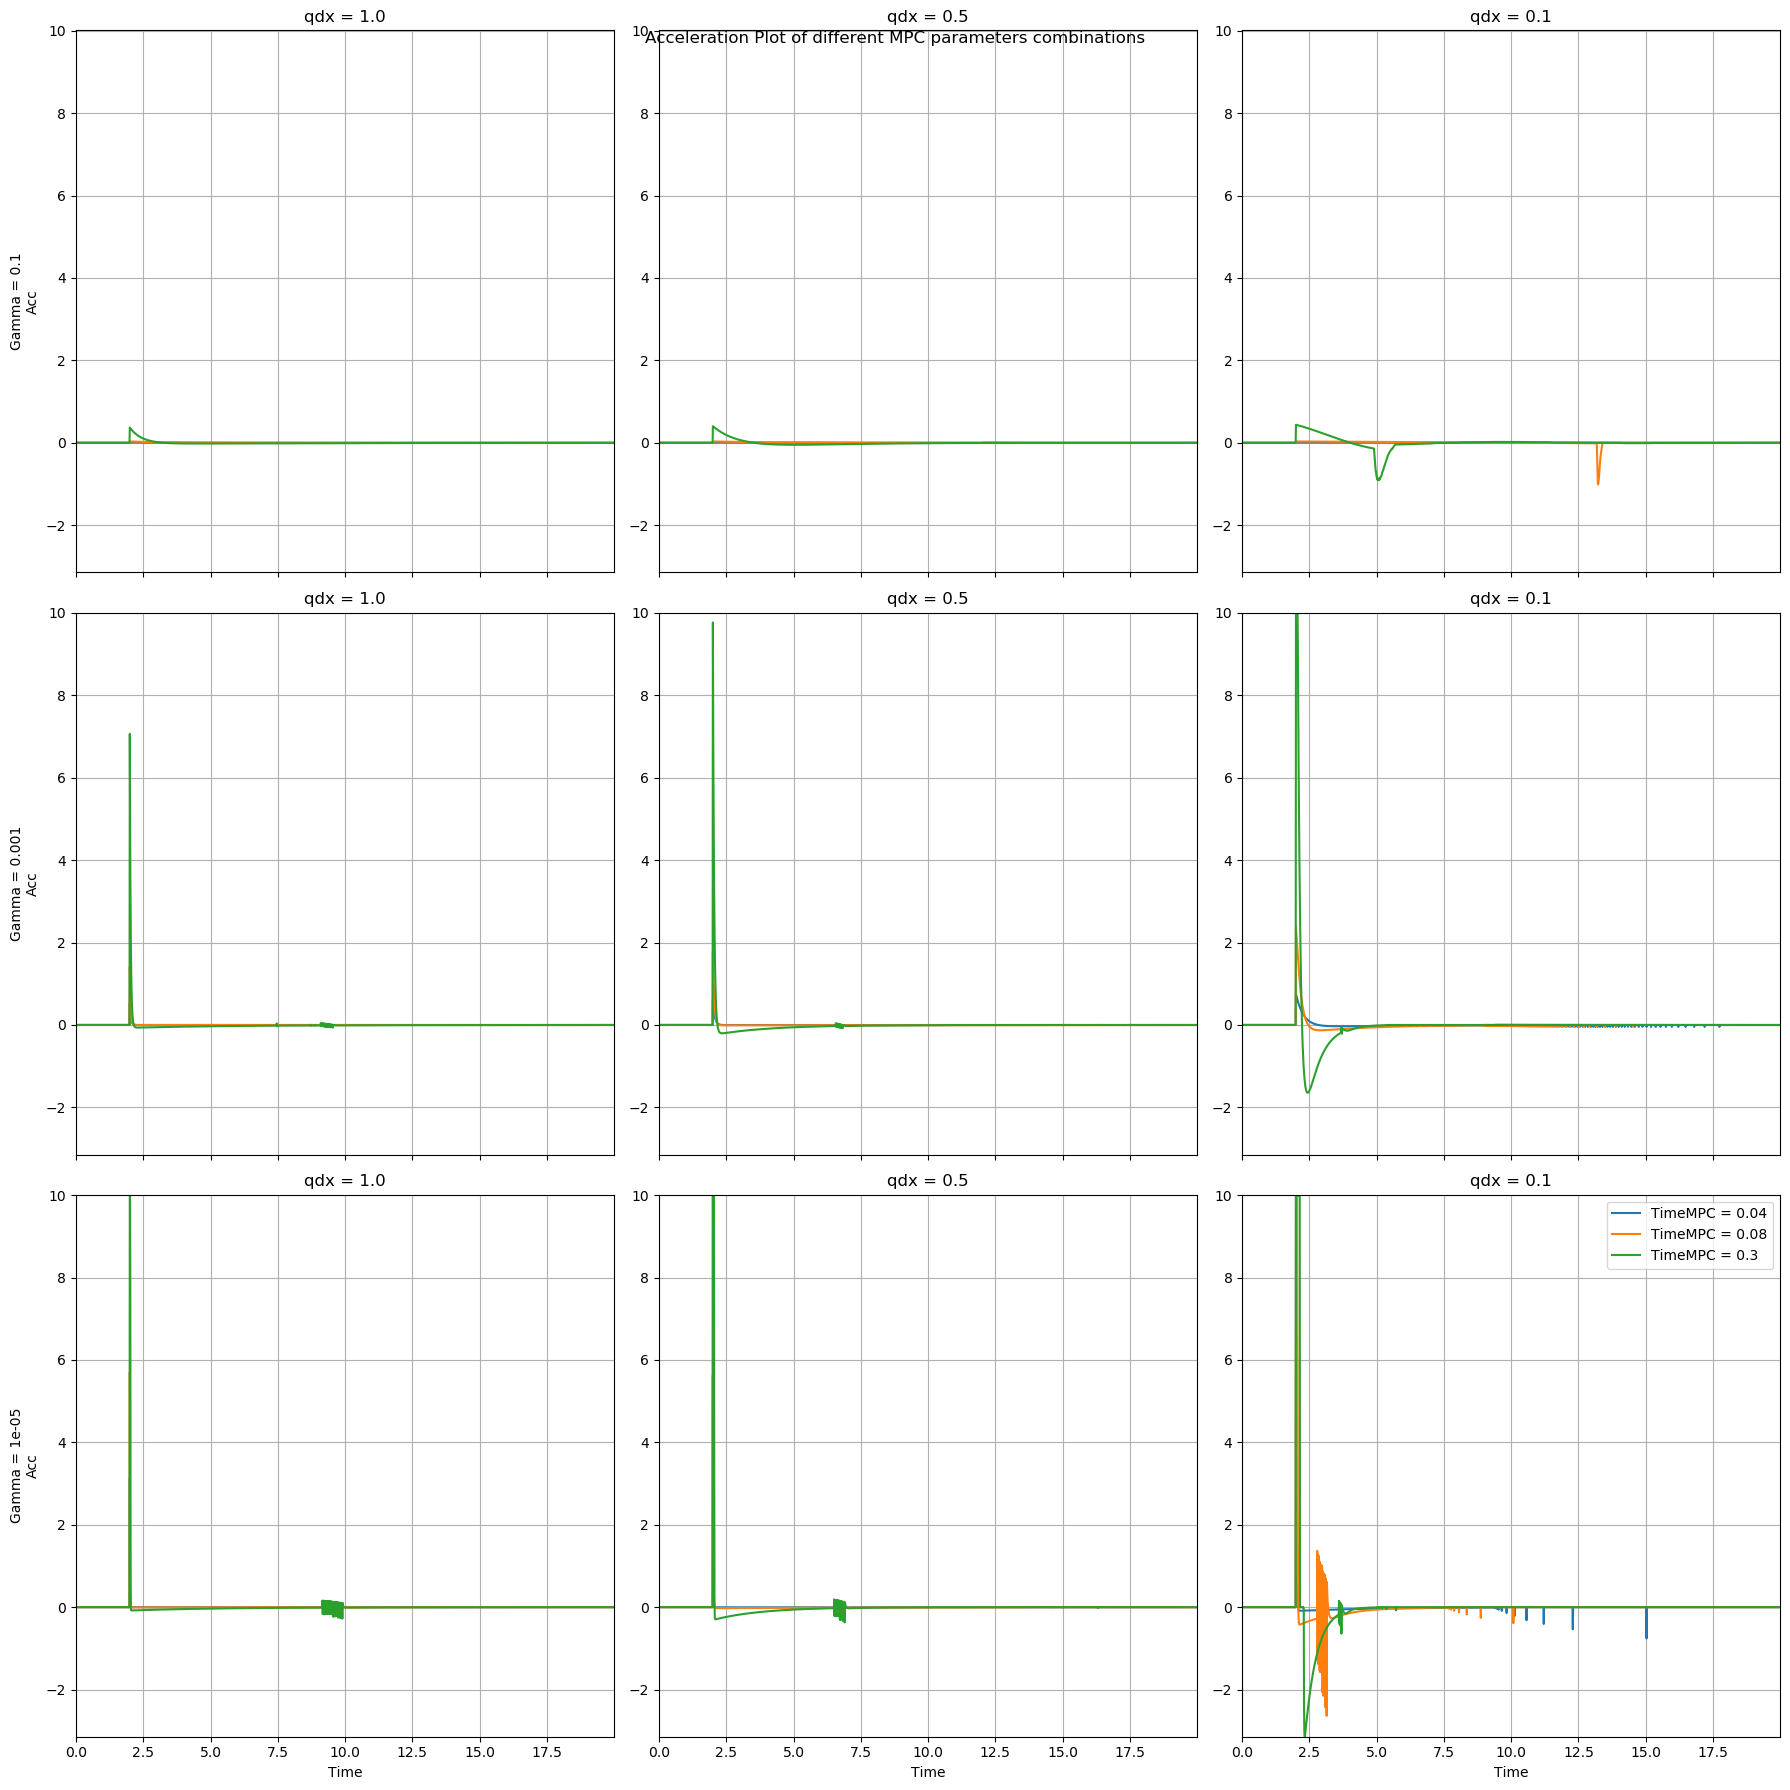

In [5]:


def create_subplot_matrix(results_dict, TimeMPC_values, qdx_values, gamma_values, plot_type='pos'):
    """
    Create a matrix of subplots based on simulation results.

    Parameters:
    - results_dict: Dictionary containing simulation results for each parameter combination
    - TimeMPC_values: List of TimeMPC values
    - qdx_values: List of qdx values
    - gamma_values: List of gamma values
    - plot_type: Type of data to plot ('pos', 'vel', or 'acc')

    Returns:
    - fig: The matplotlib figure
    - axs: 2D array of subplots
    """

    # Create a figure with subplots
    num_columns = len(qdx_values)
    fig, axs = plt.subplots(len(gamma_values), num_columns, figsize=(6 * num_columns, 6 * len(gamma_values)), sharex=True)

    # Initialize lists to store handles and labels for the legend
    legend_handles = []
    legend_labels = []

    # Loop through different gamma values
    for i, gamma in enumerate(gamma_values):
        # Initialize lists to store position and time values
        data_values = []
        time_vector = None

        for TimeMPC in TimeMPC_values:
            for j, qdx in enumerate(qdx_values):
                results = results_dict.get((TimeMPC, qdx, gamma))
                if results:
                    if time_vector is None:
                        time_vector = results['time_vector']
                    if plot_type == 'pos':
                        data = results['xn']
                    elif plot_type == 'vel':
                        data = results['dxn']
                    elif plot_type == 'acc':
                        data = results['ddxn']
                    else:
                        raise ValueError("Invalid plot_type. Use 'pos', 'vel', or 'acc'.")
                    data_values.append(data)

        # Create subplots for each gamma
        for j, TimeMPC in enumerate(TimeMPC_values):
            for k, qdx in enumerate(qdx_values):
                ax = axs[i, k]
                ax.grid(True)
                data_index = j * len(qdx_values) + k
                ax.plot(time_vector, data_values[data_index], label=f'TimeMPC = {TimeMPC}')

                if j == 0:
                    ax.set_title(f'qdx = {qdx}')

                if k == 0:
                    ax.set_ylabel(f'Gamma = {gamma}\n{plot_type.capitalize()}')

    # Collect handles and labels for the legend
    handles, labels = ax.get_legend_handles_labels()
    legend_handles.extend(handles)
    legend_labels.extend(labels)

    # Set the same axis limits for all subplots
    all_data = np.concatenate(data_values)
    xmin, xmax = min(time_vector), max(time_vector)
    ymin, ymax = all_data.min(), all_data.max()

    for ax_row in axs:
        for ax in ax_row:
            ax.set_xlim(xmin, xmax)
            ax.set_ylim(ymin, ymax)

    # Set labels for the x-axis on the bottom row
    for ax in axs[-1, :]:
        ax.set_xlabel('Time')

    # Set the grid for the entire plot

    # Create a single legend for all the subplots
    plt.legend(legend_handles, legend_labels, loc='upper right')

    # Set the plot title based on the plot type
    if plot_type == 'pos':
        fig.suptitle('Position Plot of different MPC parameters combinations')
    elif plot_type == 'vel':
        fig.suptitle('Velocity Plot of different MPC parameters combinations')
    elif plot_type == 'acc':
        fig.suptitle('Acceleration Plot of different MPC parameters combinations')

    return fig, axs

def run_simulationsCombos(parameter_combinations,total_time, delta_time):
    """
    Run simulations for different parameter combinations and plot the results.

    Parameters:
    - parameter_combinations: List of tuples containing parameter values
    - threshold_time: Time for the step function to transition
    - total_time: Total simulation time
    - delta_time: Time step between samples
    - start_time: Starting time of the step function

    

    Returns:
    - results_dict: Dictionary containing simulation results for each parameter combination
    """
    results_dict = {}
    mpc_simulator = MPCSimulator()

    dTm = 0.01 
    qx = 1.0
    Xcons = [-0.0, 1.1, -1.5, 1.5]
    Ucons = [-10, 10]

    # Example usage
    total_time = 20.0
    delta_time = 0.01

    for params in parameter_combinations:
        TimeMPC,qdx, gamma = params
        QTermCost = [1.0, qdx]
        RTermCost = [gamma]
        results = mpc_simulator.run_MPC_simulation(TimeMPC, dTm, qx, qdx, gamma, x, dx, total_time, delta_time, Xcons, Ucons, QTermCost, RTermCost)
        results_dict[(TimeMPC,qdx,gamma)] = results

    return results_dict




# Define the parameter combinations to try
TimeMPC_values = [0.04, 0.08, 0.3]
qdx_values = [1.0, 0.5, 0.1]
gamma_values = [0.1, 1e-3, 1e-5]

parameter_combinations = list(itertools.product(TimeMPC_values,qdx_values,gamma_values))
print(parameter_combinations)

# Run simulations and get the results
results_dict = run_simulationsCombos(parameter_combinations,total_time, delta_time)



# Example usage to plot velocity
fig, axs = create_subplot_matrix(results_dict, TimeMPC_values, qdx_values, gamma_values, plot_type='pos')
fig, axs = create_subplot_matrix(results_dict, TimeMPC_values, qdx_values, gamma_values, plot_type='vel')
fig, axs = create_subplot_matrix(results_dict, TimeMPC_values, qdx_values, gamma_values, plot_type='acc')

# Display the plot
plt.tight_layout()
plt.show()

## Analyzing results:

We can see from the previous figures of subplots that different combinations of 3 hyperparameters with 3 different values can give us 27 different results. Choosing the right hyperparameter combination might be tricky. The idea here is to find the best parameters for an MPC to generate a trajectory where there is only a reference target position and no reference velocity (staying with a 0 velocity). The term 'best' might be subjective, and each designer would tune these hyperparameters based on their preferences and the desired task performance. Therefore, in the next section, you will plot the effect of each hyperparameter on the results, which might help you tune the hyperparameters.

## Performance criteria

- **Overshooting ratio:** It is an indicator of whether the system has overshooted and how far it went. Note that a negative value would signify that the system never reached the reference position (undershoot).
  \begin{equation*}
  OP = \max\left(0, 100 \times \frac{\max(\mathbf{x}) - \mathbf{x}^{ref}}{\mathbf{x}^{ref}}\right)
  \end{equation*}
  where $\max(\mathbf{x})$ is the maximum reached value by the MPC-calculated state, and $\mathbf{x}^{ref}$ is the reference value at that time.

- **Convergence Error:** It is an indication of whether the system converged to the reference.
  \begin{equation*}
  \mathbf{E}_{f} = |\mathbf{x}_{f} - \mathbf{x}^{ref}_{f}|
  \end{equation*}
  where $\mathbf{x}_{f}$ is the final state position and $\mathbf{x}^{ref}_{f}$ is the final reference position.

- **Rising time:** It is an indicator of the system's speed to converge toward the reference trajectory.
  \begin{equation*}
  t_{r} = t_{90} - t_{10}
  \end{equation*}
  where $t_{90}$ and $t_{10}$ are the times it takes for the system to reach 90% and 10% of the step reaction, respectively.

- **Computation Time:** It is an indicator of how feasible the MPC system would be synchronized with the frequency of the robot and haptic device.
 \begin{equation*}
   t_c = \max_{\text{simulation}} \{ t_c^1, t_c^2, \ldots, t_c^n \}
 \end{equation*}
 Here, $t_c^i$ represents the computation time recorded at the i-th simulation instance.


In [6]:

# Define the parameter combinations to try
TimeMPC_values = [0.04,0.06,0.07, 0.08,0.09,0.1,0.2, 0.3,0.5]
qdx_values = [1.0, 0.5, 0.1]
gamma_values = [0.1,1e-3,1e-6]
parameter_combinations = list(itertools.product(TimeMPC_values,qdx_values,gamma_values))
results_dict=run_simulationsCombos(parameter_combinations,total_time, delta_time)

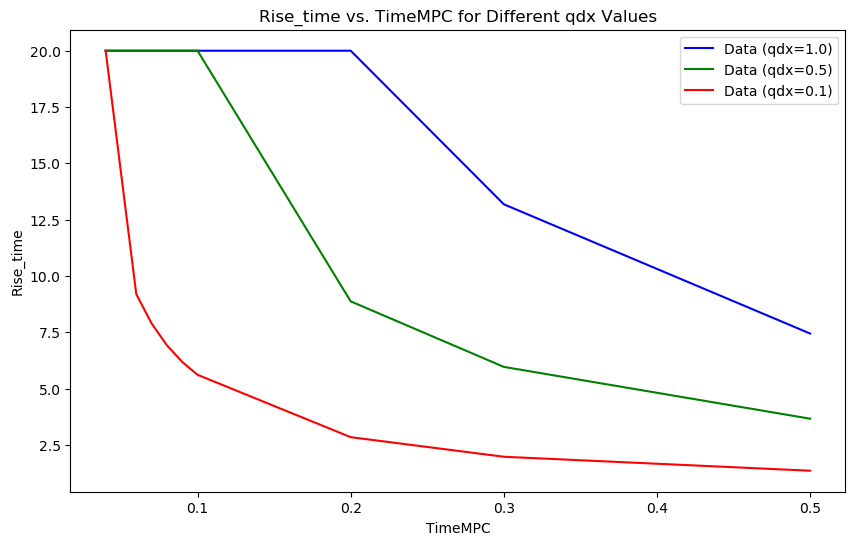

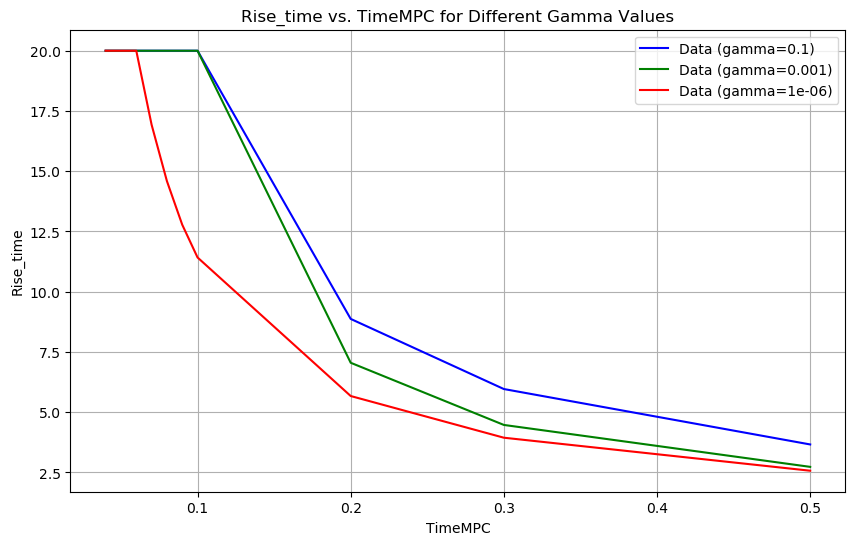

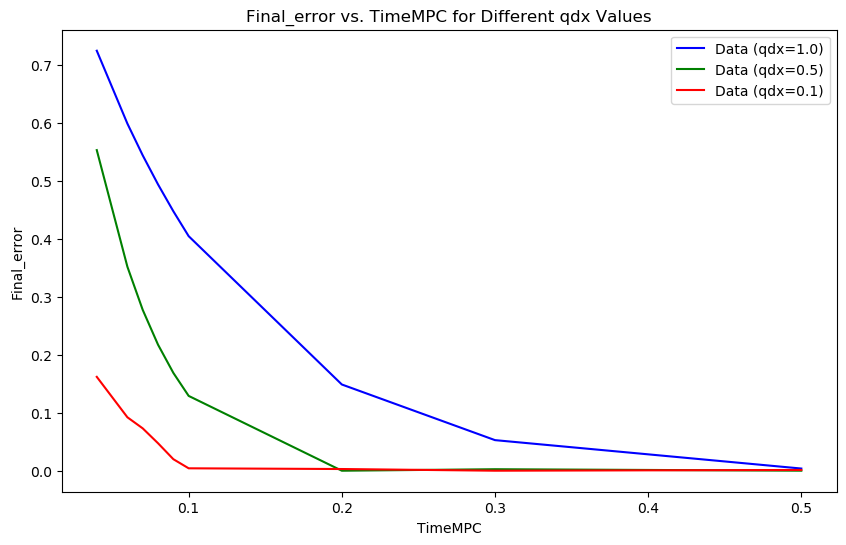

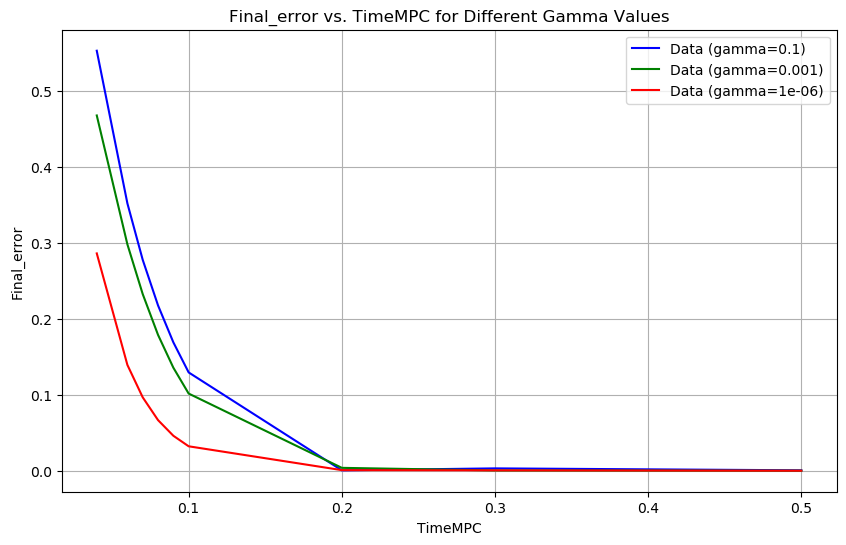

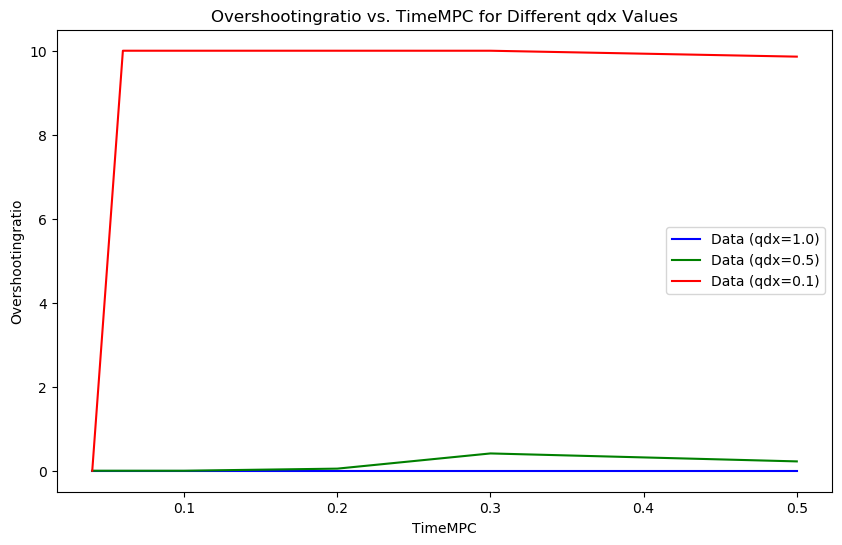

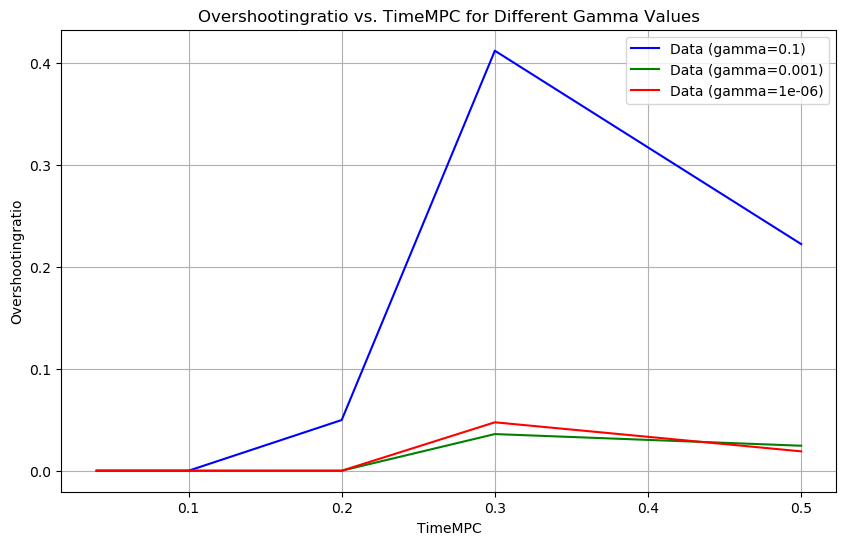

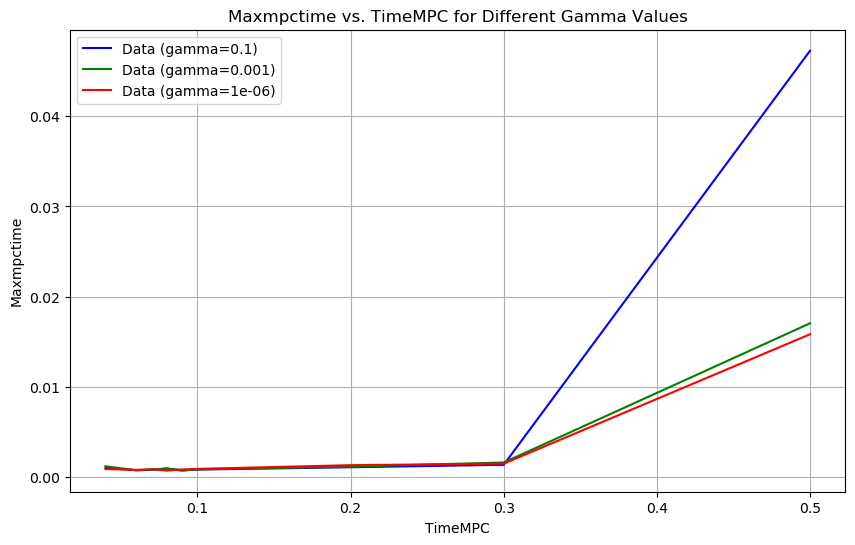

In [7]:
def plot_results6(results_dict, TimeMPC_values, qdx_values, gamma_values, result_metric):
    # Define a list of colors for plotting
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    # Create a figure and axis for qdx values
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Loop through different qdx values
    for i, qdx in enumerate(qdx_values):
        # Initialize lists to store result metric values and TimeMPC values
        result_values = []
        time_mpc_values = []

        # Loop through different TimeMPC values
        for TimeMPC in TimeMPC_values:
            results = results_dict.get((TimeMPC, qdx, gamma_values[0]))
            if results:
                result_value = results[result_metric]
                time_mpc_values.append(TimeMPC)
                result_values.append(result_value)

        # Create a scatter plot of the result metric values for qdx
        ax1.plot(time_mpc_values, result_values, label=f'Data (qdx={qdx})', color=colors[i])

    # Set labels and title for qdx plot
    ax1.set_xlabel('TimeMPC')
    ax1.set_ylabel(result_metric.capitalize())
    ax1.set_title(f'{result_metric.capitalize()} vs. TimeMPC for Different qdx Values')

    # Add legend for qdx plot
    ax1.legend()

    # Create a figure and axis for gamma values
    fig, ax2 = plt.subplots(figsize=(10, 6))

    # Loop through different gamma values
    for i, gamma in enumerate(gamma_values):
        # Initialize lists to store result metric values and TimeMPC values
        result_values = []
        time_mpc_values = []

        # Loop through different TimeMPC values
        for TimeMPC in TimeMPC_values:
            results = results_dict.get((TimeMPC, qdx_values[1], gamma))
            if results:
                result_value = results[result_metric]
                time_mpc_values.append(TimeMPC)
                result_values.append(result_value)

        # Create a scatter plot of the result metric values for gamma
        ax2.plot(time_mpc_values, result_values, label=f'Data (gamma={gamma})', color=colors[i])

    # Set labels and title for gamma plot
    ax2.set_xlabel('TimeMPC')
    ax2.set_ylabel(result_metric.capitalize())
    ax2.set_title(f'{result_metric.capitalize()} vs. TimeMPC for Different Gamma Values')

    # Add legend for gamma plot
    ax2.legend()

    # Display the plots
    plt.grid(True)
    plt.show()



result_metric = 'rise_time'
plot_results6(results_dict, TimeMPC_values, qdx_values,gamma_values, result_metric)
result_metric = 'Final_Error'
plot_results6(results_dict, TimeMPC_values, qdx_values,gamma_values, result_metric)
result_metric = 'OvershootingRatio'
plot_results6(results_dict, TimeMPC_values, qdx_values,gamma_values, result_metric)
result_metric = 'Maxmpctime'
plot_results6(results_dict, TimeMPC_values, qdx_values,gamma_values, result_metric)




## Conclusion for these results:

From the analysis of the performance criteria, it is evident that increasing the time horizon, TimeMPC, leads to improved performance in terms of all the metrics considered. This observation aligns with the principles of Model Predictive Control (MPC), where a longer time horizon allows for better optimization and decision-making. Although the accuracy of having a solution when using a higher time horizon might decrease given the summation that happens when we solve it as a QP  to get a solution but it remains not important given that we are optimizing and choosing the next time horizon step in each iteration.

However, it is important to note that as the time horizon increases, the computational cost also increases significantly. Solving the MPC problem as a Quadratic Programming (QP) optimization becomes more computationally intensive due to the increased number of variables and constraints. This increase in computation time is expected, but it is crucial to strike a balance between performance and computational feasibility.
As we have also seen, the velocity coefficient can alternate the rise time significiantly but it comes at the cost of the overshooting. The acceleration coefficient $\gamma$'s choice is also vital as it can alter all the performance metrics and also the acceleration shape(which is not easy to track in the result performance and might need another metric for this).

Therefore,The trade-off between all the performance metrics and the computation time must be carefully considered. While a longer time horizon may yield better results, there is a point of diminishing returns where the increase in performance becomes marginal compared to the exponential increase in computation time. Finding the optimal time horizon manually by trying different parameter combinations is a challenging task, as evidenced by the 27 combinations tested in this analysis.

To overcome this challenge, automated methods such as optimization algorithms or machine learning techniques can be employed to search for the optimal parameter combination. These methods can efficiently explore the parameter space and identify the combination that strikes the best balance between performance and computation time.



# Next Chapter: Hyper-Parameter Tuning in MPC

In this Jupyter Notebook, we have explored the concept of Model Predictive Control (MPC) and its application in trajectory generation. One of the key challenges in implementing MPC is the tuning of hyper-parameters.

In the case of MPC, these hyper-parameters include the time horizon (TimeMPC), the velocity coefficient (qdx), and the acceleration coefficient (gamma). The choice of these hyper-parameters can significantly impact the performance of the MPC system. However, finding the optimal values for these hyper-parameters is a challenging task. It requires a deep understanding of the system dynamics, the desired task performance, and the trade-offs between different performance metrics. It also involves a trial-and-error process of testing different combinations of hyper-parameter values and evaluating their impact on the system's behavior.

The difficulty of hyper-parameter tuning in MPC arises from several factors. First, the performance of the MPC system is highly sensitive to the chosen hyper-parameter values. Small changes in these values can lead to significant changes in the system's behavior, such as convergence speed, overshooting, and computational time.

Second, the impact of each hyper-parameter on the system's behavior is not always intuitive. For example, increasing the time horizon (TimeMPC) may improve performance in terms of convergence and accuracy, but it also increases the computational cost. Similarly, adjusting the velocity coefficient (qdx) can affect the rise time and overshooting, but finding the right balance is challenging.

Third, the optimal values for hyper-parameters may vary depending on the specific task and system requirements. What works well for one application may not work well for another. This makes hyper-parameter tuning a highly context-dependent process that requires domain knowledge and expertise.

To overcome the difficulty of hyper-parameter tuning in MPC, the next chapter will involde an automated approach that finds the optimal combination for the MPC parameters depending on the designer's preferences and needs.
